<a href="https://colab.research.google.com/github/dansarmiento/MachineLearning/blob/main/K_Nearest_Neighbors_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Working with k-nearest neighbors to classify data.  This dataset is from a telecom provider that has segmented its customer base by service usage patterns, categorizing into four groups.  if demographics data can be used to predict group membership, the company can customize offers for individual prospective customers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
# https://docs.google.com/spreadsheets/d/1Y2xeVtHKH79jWFpcYtuXYugXOd93KdN2PD1YSBNzers/edit?usp=sharing
sheet_id = "1Y2xeVtHKH79jWFpcYtuXYugXOd93KdN2PD1YSBNzers"
sheet_name = "Sheet1"

gsheet_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(sheet_id,sheet_name)
df = pd.read_csv(gsheet_url)
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/','_')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
# data analysis and visualization
# in the data dictionary, 1: basic service, 2: e-service, 3: plus service, 4: total service
df.custcat.value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


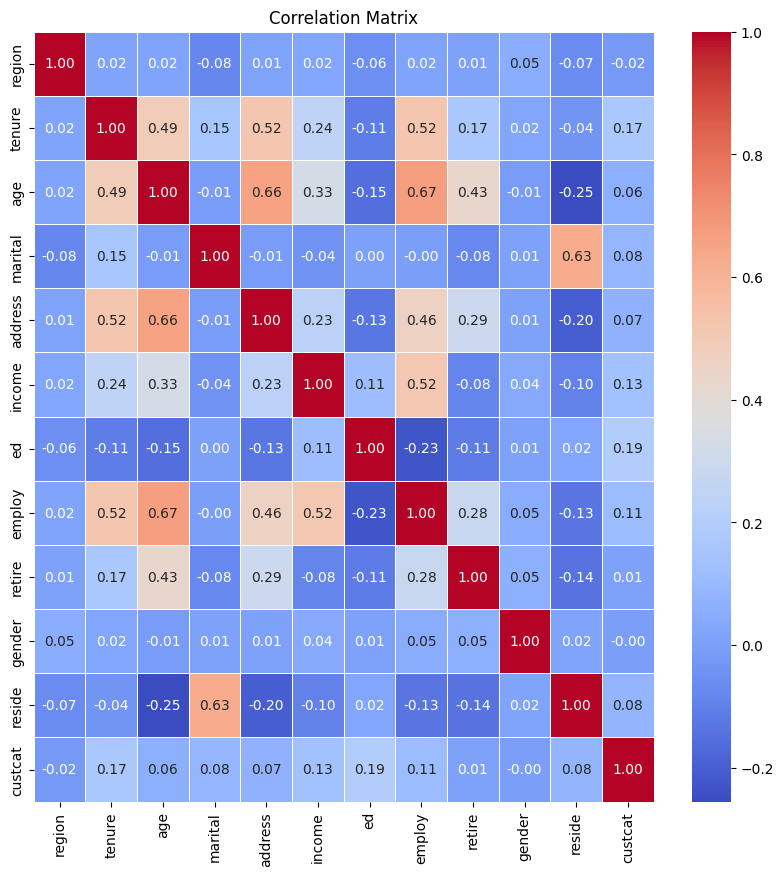

In [4]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [5]:
# list the correlated veatures in descending order

abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)

,custcat
ed,0.193864
tenure,0.166691
income,0.134525
employ,0.110011
marital,0.083836
reside,0.082022
address,0.067913
age,0.056909
region,0.023771
retire,0.008908


In [6]:
# separate the input and target features

X = df.drop('custcat', axis=1)
y = df.custcat

**Normalize data**

data normalization is important for the KNN model.  KNN makes predictions based on teh distance between data points.  for a given test point, the algorithm finds the nearest neighbors by measuring the distance between the test point and other data points in the dataset.  by normalizing the data, you ensure that all features contribute equally to the distance calculation

In [7]:
X_norm = StandardScaler().fit_transform(X)

In [8]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [9]:
# now we train the model starting with a small value like k=3 or 4

k=3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train, y_train)

In [10]:
# predicting

yhat = knn_model.predict(X_test)

In [11]:
# accuracy evaluation = correct predictions over total predictions

accuracy_score(y_test, yhat)

0.365

In [16]:
# check the model performance for different Ks
Ks = 10
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

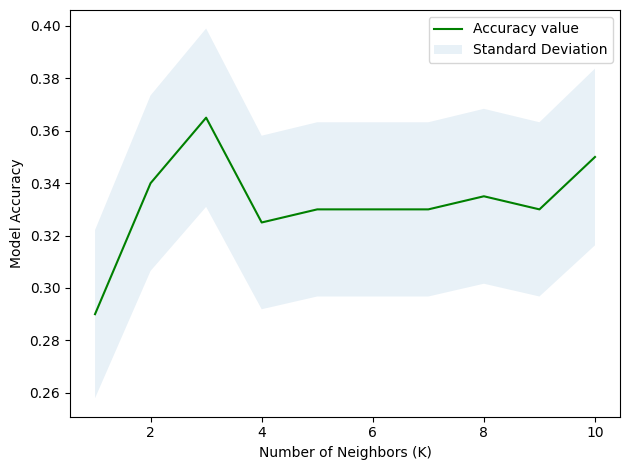

In [17]:
# visualize the performance
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [18]:
# check the model performance for 100 Ks
Ks = 100
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

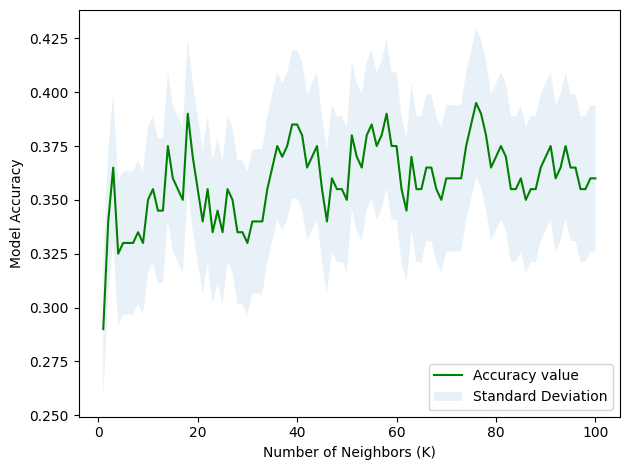

In [19]:
# visualize the performance
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

too many Ks can lead to:
- Smoothing of the Decision Boundary: The decision boundary becomes smoother, which means the model is less sensitive to the noise or fluctuations in the training data.
- Less Specific Predictions: With a larger k, the model considers more neighbors and therefore makes more generalized predictions, which can lead to fewer instances being classified perfectly.